# Creating the images for 3D recontruction
We load the selected vessels:

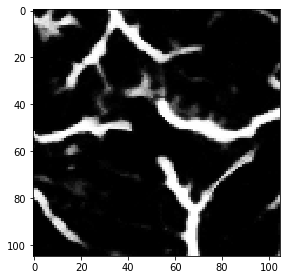

In [1]:
import numpy as np

vessel_selection = "./input_images/RH_vessels_selection.png"

from skimage import io
vs_im_o = io.imread(vessel_selection, as_gray=True)  # imported as np array between 1 (rendered as black) and 0 (rendered as white)
io.imshow(vs_im_o)

Then we binarize:

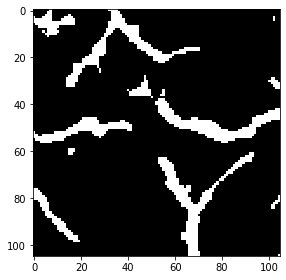

In [2]:
# binarize
threshold = 0.5
vs_im = vs_im_o.copy()
vs_im[vs_im >= threshold] = 1.
vs_im[vs_im < threshold] = 0.
io.imshow(vs_im)

And we remove small imperfections using `remove_small_objects`

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


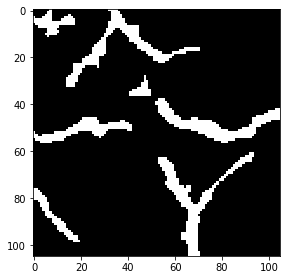

In [3]:
# remove small object
from skimage.morphology import remove_small_objects
mask = remove_small_objects(vs_im.astype(bool), 20)
vs_im[mask] = 1.
vs_im[~mask] = 0.
io.imshow(vs_im)
io.imsave("out/RH_vessels_binary.png", vs_im)

We skeletonze to find the center points for the vessels

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: out/RH_vessels_skeleton.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  """


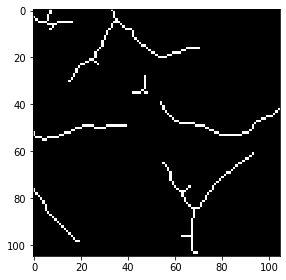

In [4]:
# skeletonize
from skimage.morphology import skeletonize
skeleton = skeletonize(vs_im)
io.imshow(skeleton)
io.imsave("out/RH_vessels_skeleton.png", skeleton)

And  finally we compute the edges:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: out/RH_vessels_edges.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  """


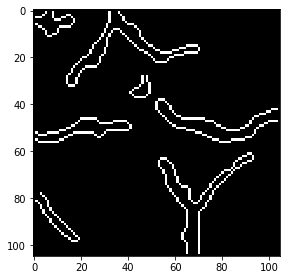

In [5]:
# find edges
from skimage import feature
edges = skeletonize(feature.canny(vs_im, sigma=0.8))
io.imshow(edges)
io.imsave("out/RH_vessels_edges.png", edges)

The reconstruction above leads to two discontinuous vessels, which might be an artifact introduced by our methodology. Thus, we tried to remove them to see if they change the result of the simulations:

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


1.0
0.0


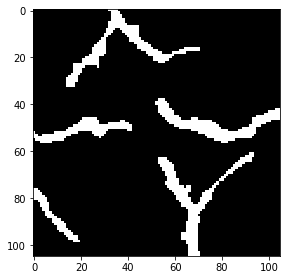

In [6]:
# load binary without discontinuities (modified with FIJI)
vs_im_nd = io.imread("./input_images/RH_vessels_binary_no_discontinuities.png", as_gray=True)
# binarize
vs_im_nd = vs_im_nd / np.amax(vs_im_nd)
vs_im_nd[vs_im_nd >= 0.5] = 1.
vs_im_nd[vs_im_nd < 0.5] = 0.
print(np.amax(vs_im_nd))
print(np.amin(vs_im_nd))

io.imshow(vs_im_nd)
io.imsave("out/RH_vessels_binary_ND.png", vs_im_nd)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: out/RH_vessels_skeleton_ND.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  after removing the cwd from sys.path.


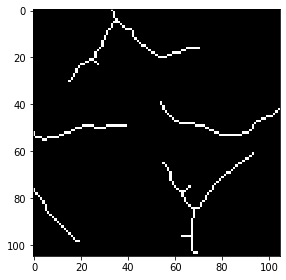

In [7]:
# skeletonize
skeleton = skeletonize(vs_im_nd)
io.imshow(skeleton)
io.imsave("out/RH_vessels_skeleton_ND.png", skeleton)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: out/RH_vessels_edges_ND.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  after removing the cwd from sys.path.


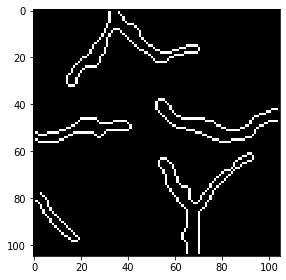

In [8]:
# find edges
edges = skeletonize(feature.canny(vs_im_nd, sigma=0.8))
io.imshow(edges)
io.imsave("out/RH_vessels_edges_ND.png", edges)

However, no difference in the simulations results was found using one image or the other.